In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import sklearn
import seaborn as sb
import re
import tqdm


In [2]:
def stripping(liste):
    return [i.strip() for i in liste]

df=pd.read_csv('data/df_tokenized_port_2.csv',converters={'sent_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),'word_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize_without_stopwords': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'word_tokenize_without_stopwords_port': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
})

In [3]:
df['word_tokenize']=df['word_tokenize'].apply(stripping)
df['sent_tokenize']=df['sent_tokenize'].apply(stripping)
df['word_tokenize_without_stopwords']=df['word_tokenize_without_stopwords'].apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].apply(stripping)

In [16]:
def streudiagramm(x_achse, y_achse):
    plt.plot(x_achse, y_achse, 'o')
    m, b = np.polyfit(x_achse, y_achse, 1)
    plt.plot(x_achse, m*x_achse+b)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'gender', 'age', 'topic', 'sign', 'date', 'text',
       'lang', 'language_2', 'word_tokenize', 'sent_tokenize', 'count_word',
       'count_sent', 'word_tokenize_num_of_stopwords',
       'word_tokenize_without_stopwords',
       'word_tokenize_without_stopwords_port'],
      dtype='object')

TypeError: can only concatenate str (not "float") to str

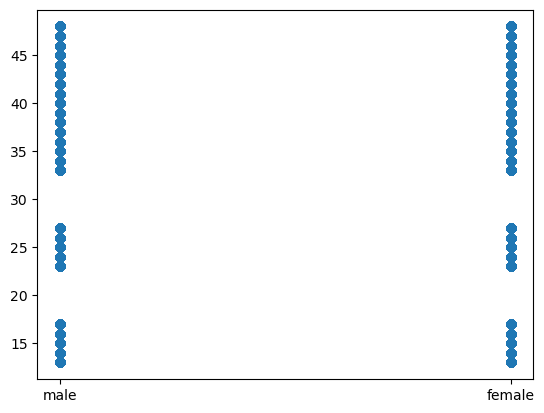

In [17]:
streudiagramm(df["gender"], df["age"])

<AxesSubplot:xlabel='gender'>

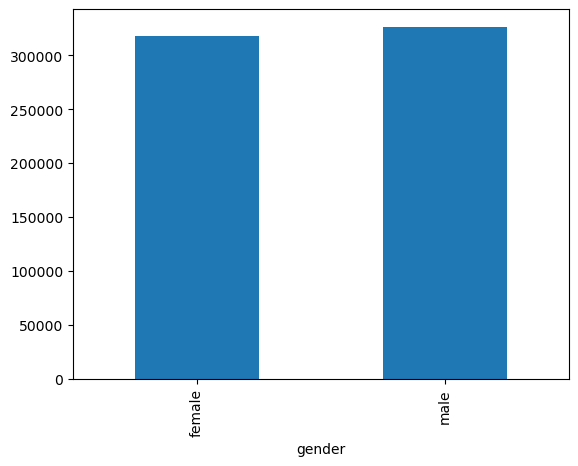

In [20]:
df_grouped = df.groupby(by="gender").size()
df_grouped.plot.bar()

<AxesSubplot:xlabel='age'>

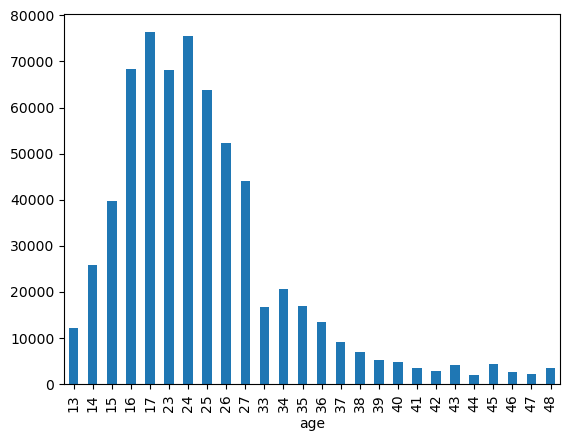

In [21]:
df_grouped = df.groupby(by="age").size()
df_grouped.plot.bar()

<AxesSubplot:xlabel='date'>

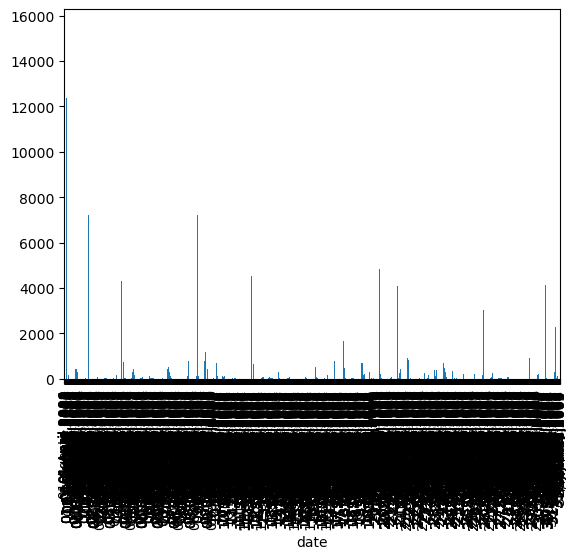

In [22]:
df_grouped = df.groupby(by="date").size()
df_grouped.plot.bar()

<AxesSubplot:xlabel='topic'>

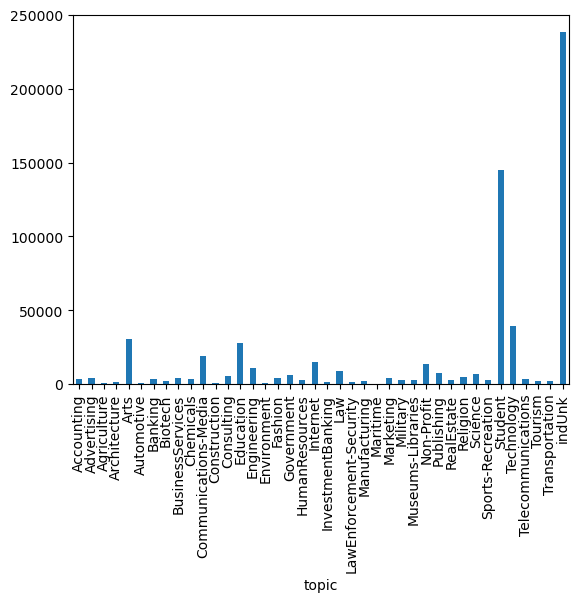

In [23]:
df_grouped = df.groupby(by="topic").size()
df_grouped.plot.bar()

<AxesSubplot:xlabel='sign'>

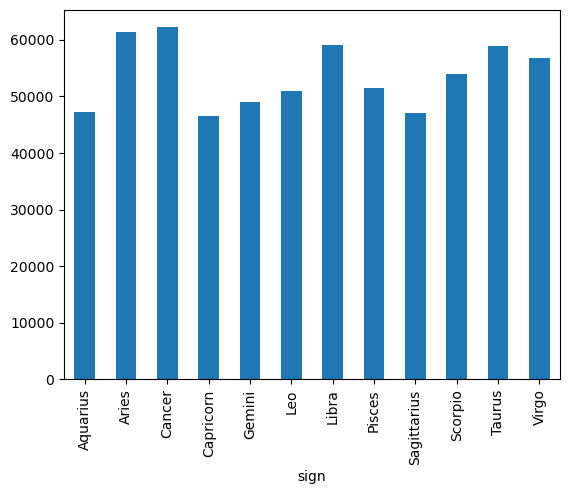

In [25]:
df_grouped = df.groupby(by="sign").size()
df_grouped.plot.bar()

<AxesSubplot:ylabel='Frequency'>

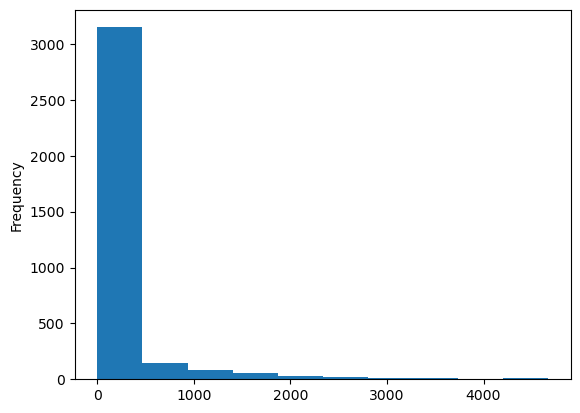

In [35]:
df_grouped = df.groupby(by="count_word").size()
df_grouped.plot.hist(bins=10)

In [40]:
print("Mean: " + str(df["count_word"].mean()))
print("Std: " + str(df["count_word"].std()))
print("Median: " + str(df["count_word"].median()))
print("Min: " + str(df["count_word"].min()))
print("Max: " + str(df["count_word"].max()))

Mean: 236.18862796411935
Std: 471.7148191567821
Median: 138.0
Min: 1
Max: 141681


<AxesSubplot:ylabel='Frequency'>

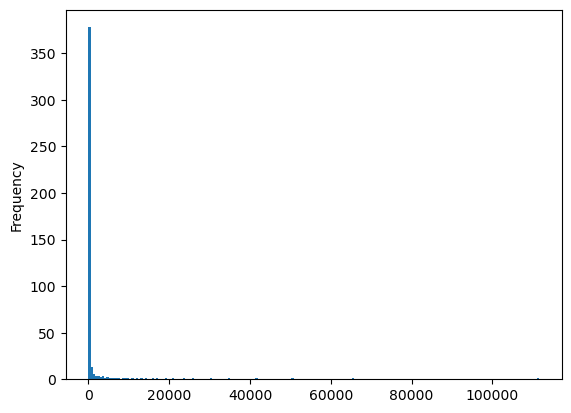

In [36]:
df_grouped = df.groupby(by="count_sent").size()
df_grouped.plot.hist(bins=200)

In [39]:
print("Mean: " + str(df["count_sent"].mean()))
print("Std: " + str(df["count_sent"].std()))
print("Median: " + str(df["count_sent"].median()))
print("Min: " + str(df["count_sent"].min()))
print("Max: " + str(df["count_sent"].max()))

Mean: 11.53176499075665
Std: 22.196584230294096
Median: 6.0
Min: 1
Max: 5891


In [49]:
col ="age"
print("Spalte: " + col)
print("Mean: " + str(df[col].mean()))
print("Std: " + str(df[col].std()))
print("Median: " + str(df[col].median()))
print("Min: " + str(df[col].min()))
print("Max: " + str(df[col].max()))
print("--------------------------")

col ="count_word"
print("Spalte: " + col)
print("Mean: " + str(df[col].mean()))
print("Std: " + str(df[col].std()))
print("Median: " + str(df[col].median()))
print("Min: " + str(df[col].min()))
print("Max: " + str(df[col].max()))
print("--------------------------")

col ="count_sent"
print("Spalte: " + col)
print("Mean: " + str(df[col].mean()))
print("Std: " + str(df[col].std()))
print("Median: " + str(df[col].median()))
print("Min: " + str(df[col].min()))
print("Max: " + str(df[col].max()))
print("--------------------------")

Spalte: age
Mean: 23.968518285688564
Std: 7.7968255831017546
Median: 24.0
Min: 13
Max: 48
--------------------------
Spalte: count_word
Mean: 236.18862796411935
Std: 471.7148191567821
Median: 138.0
Min: 1
Max: 141681
--------------------------
Spalte: count_sent
Mean: 11.53176499075665
Std: 22.196584230294096
Median: 6.0
Min: 1
Max: 5891
--------------------------


In [53]:
df_womans = df[df["gender"] == "female"]
df_mans = df[df["gender"] == "male"]

In [54]:
df_womans.describe()

,Unnamed: 0,id,age,count_word,count_sent,word_tokenize_num_of_stopwords
count,317786.000000,3.177860e+05,317786.000000,317786.000000,317786.000000,317786.000000
mean,330132.178409,2.403467e+06,23.902016,243.942062,11.889643,92.647124
std,187206.278106,1.226740e+06,7.874286,493.025509,23.049560,197.445503
min,52.000000,1.176200e+04,13.000000,1.000000,1.000000,0.000000
25%,171265.250000,1.283465e+06,17.000000,56.000000,2.000000,19.000000
50%,334949.500000,2.581616e+06,24.000000,150.000000,6.000000,55.000000
75%,494384.500000,3.534015e+06,26.000000,314.000000,15.000000,120.000000
max,644126.000000,4.337133e+06,48.000000,141681.000000,5891.000000,55025.000000


In [55]:
df_mans.describe()

,Unnamed: 0,id,age,count_word,count_sent,word_tokenize_num_of_stopwords
count,326461.000000,3.264610e+05,326461.000000,326461.000000,326461.000000,326461.000000
mean,314326.648307,2.372117e+06,24.033254,228.641225,11.183397,85.693017
std,184441.520398,1.266036e+06,7.720139,449.874548,21.327811,165.469569
min,0.000000,5.114000e+03,13.000000,1.000000,1.000000,0.000000
25%,153169.000000,1.153868e+06,17.000000,47.000000,2.000000,15.000000
50%,309617.000000,2.566077e+06,24.000000,126.000000,6.000000,45.000000
75%,472579.000000,3.519080e+06,27.000000,282.000000,13.000000,106.000000
max,644246.000000,4.337650e+06,48.000000,92163.000000,3830.000000,29603.000000


<AxesSubplot:xlabel='topic'>

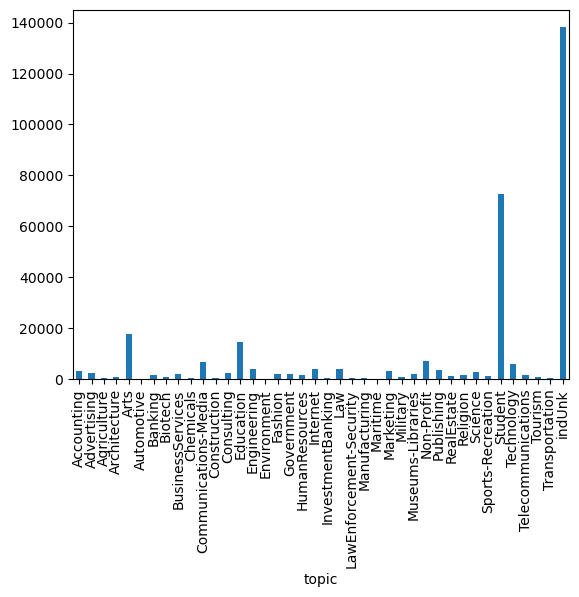

In [57]:
df_grouped = df_womans.groupby(by="topic").size()
df_grouped.plot.bar()

<AxesSubplot:xlabel='topic'>

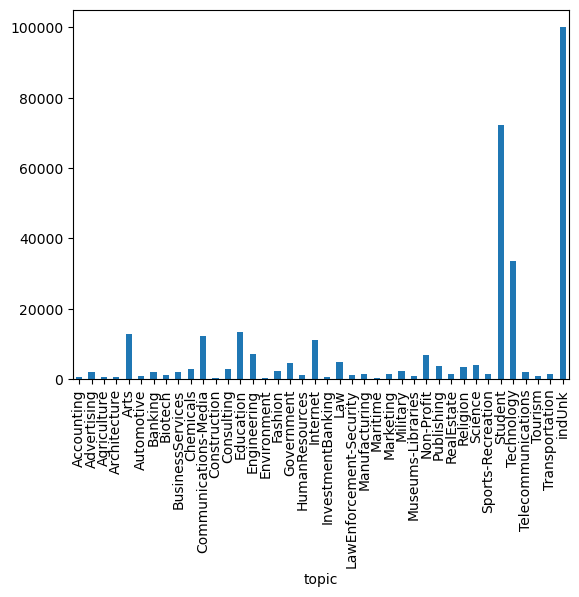

In [58]:
df_grouped = df_mans.groupby(by="topic").size()
df_grouped.plot.bar()